# 6조
```
팀장 : 이예준

팀원 : 최수연, 최아름
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline

### 폰트가 깨지는 것을 방지합니다.

In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 2016년 ~ 2019년 총 4개년에 400만 표본을 이용해 분석할 예정입니다.
2000만명이 넘는 인구 중에서(건강검진 대상자) 1년당 100만명씩 추출한 표본이 겹치지 않을 것이라고 가정하였습니다.

결손치유무, 치아마모증유무, 제3대구치(사랑니)이상 항목은 2013년 이전에만 있기 때문에 제외시킵니다.

In [4]:
med19 = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/Medical_Check_2019.csv')
med19 = med19.drop(['결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상'], axis=1)

med18 = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/Medical_Check_2018.csv')
med18 = med18.drop(['결손치유무', '치아마모증유무', '제3대구치(사랑니)이상'], axis=1)

med17 = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/Medical_Check_2017.csv')
med17 = med17.drop(['결손치유무', '치아마모증유무', '제3대구치(사랑니)이상'], axis=1)

med16 = pd.read_csv('C:/Users/user/LikeLion_AI/data/CSV/Medical_Check_2016.csv')
# med16 = med16.drop(['결손치유무', '치아마모증유무', '제3대구치(사랑니)이상'], axis=1)

#### 2019년 항목의 컬럼 배치가 다른 년도와 달라 재배치 해줍니다.

In [5]:
med19 = med19.loc[:, ['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
                      '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', 
                      '감마지티피', '흡연상태', '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자']]

med19.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [6]:
print(med19.shape)
print(med18.shape)
print(med17.shape)
print(med16.shape)

# med19.columns, med18.columns, med17.columns, med16.columns

(1000000, 31)
(1000000, 31)
(1000000, 31)
(1000000, 31)


#### 시도코드 또한 19년/18년과 17년/16년이 다릅니다. 그래서 각자 mapping 해줍니다.

In [6]:
med19['시도코드'] = med19['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 50: '제주도'})

med18['시도코드'] = med18['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 50: '제주도'})

med17['시도코드'] = med17['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 49: '제주도'})

med16['시도코드'] = med16['시도코드'].map({11: '서울특별시', 41: '경기도', 42: '강원도', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
                                 29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종시', 
                                 43: '충청북도', 44: '충청남도', 45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도', 49: '제주도'})

#### 결측치 확인

In [25]:
med19.isnull().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               403
시력(좌)              195
시력(우)              188
청력(좌)              181
청력(우)              178
수축기 혈압            5424
이완기 혈압            5425
식전혈당(공복혈당)        5523
총 콜레스테롤         666451
트리글리세라이드        666456
HDL 콜레스테롤       666459
LDL 콜레스테롤       672852
혈색소               5532
요단백              10306
혈청크레아티닌           5526
(혈청지오티)AST        5522
(혈청지오티)ALT        5523
감마 지티피            5530
흡연상태               166
음주여부            355082
구강검진 수검여부            0
치아우식증유무         602320
치석              602320
데이터 공개일자             0
dtype: int64

In [22]:
med18.isnull().sum()

기준년도                0
가입자일련번호             0
성별코드                0
연령대코드(5세단위)         0
시도코드                0
신장(5Cm단위)           0
체중(5Kg단위)           0
허리둘레              414
시력(좌)             253
시력(우)             266
청력(좌)             217
청력(우)             217
수축기혈압            5730
이완기혈압            5730
식전혈당(공복혈당)       5915
총콜레스테롤         667244
트리글리세라이드       667252
HDL콜레스테롤       667254
LDL콜레스테롤       674122
혈색소              5914
요단백             10570
혈청크레아티닌          5906
(혈청지오티)AST       5906
(혈청지오티)ALT       5906
감마지티피            5909
흡연상태              234
음주여부           354943
구강검진수검여부            0
치아우식증유무        600008
치석             622370
데이터공개일자             0
dtype: int64

In [23]:
med17.isnull().sum()

기준년도                 0
가입자일련번호              0
성별코드                 0
연령대코드(5세단위)          0
시도코드                 0
신장(5Cm단위)          897
체중(5Kg단위)          897
허리둘레               193
시력(좌)              300
시력(우)              299
청력(좌)              266
청력(우)              266
수축기혈압               88
이완기혈압               89
식전혈당(공복혈당)          48
총콜레스테롤              43
트리글리세라이드            44
HDL콜레스테롤            47
LDL콜레스테롤          2631
혈색소                 53
요단백               4899
혈청크레아티닌             45
(혈청지오티)AST          42
(혈청지오티)ALT          43
감마지티피               43
흡연상태               213
음주여부           1000000
구강검진 수검여부            0
치아우식증유무        1000000
치석              620016
데이터공개일자              0
dtype: int64

In [24]:
med16.isnull().sum()

기준년도                0
가입자일련번호             0
성별코드                0
연령대코드(5세단위)         0
시도코드                0
신장(5Cm단위)           0
체중(5Kg 단위)          0
허리둘레                0
시력(좌)             144
시력(우)             155
청력(좌)             113
청력(우)             119
수축기혈압               0
이완기혈압               0
식전혈당(공복혈당)          0
총콜레스테롤              0
트리글리세라이드            0
HDL콜레스테롤            0
LDL콜레스테롤         3189
혈색소                 0
요단백              4544
혈청크레아티닌             0
(혈청지오티)AST          0
(혈청지오티)ALT          0
감마지티피               0
흡연상태              401
음주여부              836
구강검진 수검여부           0
치아우식증유무        895371
치석유무           618877
데이터 기준일자            0
dtype: int64

#### 4개 년치 자료를 하나로 통합해줍니다.

In [7]:
med_total = pd.concat([med19, med18, med17, med16], ignore_index=True)

med_total.shape

(4000000, 31)

In [107]:
sum(med_total['시도코드'].value_counts().values)

4000000

In [10]:
med_total.isnull().sum()

기준년도                 0
가입자일련번호              0
성별코드                 0
연령대코드(5세단위)          0
시도코드                 0
신장(5Cm단위)          897
체중(5Kg단위)          897
허리둘레              1010
시력(좌)              892
시력(우)              908
청력(좌)              777
청력(우)              780
수축기혈압            11242
이완기혈압            11244
식전혈당(공복혈당)       11486
총콜레스테롤         1333738
트리글리세라이드       1333752
HDL콜레스테롤       1333760
LDL콜레스테롤       1352794
혈색소              11499
요단백              30319
혈청크레아티닌          11477
(혈청지오티)AST       11470
(혈청지오티)ALT       11472
감마지티피            11482
흡연상태              1014
음주여부           1710861
구강검진 수검여부            0
치아우식증유무        3097699
치석             2463583
데이터 공개일자             0
dtype: int64

In [10]:
med_total.value_counts(['연령대코드(5세단위)', '성별코드']).sort_index()

연령대코드(5세단위)  성별코드
5            1        44626
             2        57140
6            1       143281
             2       123112
7            1       207464
             2       124619
8            1       228373
             2       111341
9            1       280209
             2       234242
10           1       249982
             2       212533
11           1       266911
             2       260801
12           1       220145
             2       212502
13           1       201128
             2       213718
14           1       109787
             2       110656
15           1        96993
             2       109520
16           1        45636
             2        56164
17           1        26997
             2        36859
18           1         5002
             2        10259
dtype: int64

In [12]:
med_total.groupby(['연령대코드(5세단위)', '성별코드'])['신장(5Cm단위)'].mean()

연령대코드(5세단위)  성별코드
5            1       172.365213
             2       160.149303
6            1       173.053325
             2       160.557772
7            1       173.355519
             2       160.495749
8            1       172.876788
             2       159.908277
9            1       171.732040
             2       158.906608
10           1       170.383420
             2       157.493624
11           1       168.909569
             2       156.169869
12           1       167.675376
             2       154.961949
13           1       166.224485
             2       153.588187
14           1       165.060215
             2       152.351952
15           1       164.264569
             2       151.056337
16           1       163.146066
             2       149.056122
17           1       161.971320
             2       147.207799
18           1       160.652783
             2       145.299530
Name: 신장(5Cm단위), dtype: float64

#### 결측치가 많은 치아우식증유무, 치석 항목을 삭제해줍니다.

In [8]:
med_total = med_total.drop(['치아우식증유무', '치석'], axis=1)

# med_total.info()

#### 결측치를 삭제해줍니다.

In [9]:
med_total_1 = med_total.dropna()   # med_total_1 : 결측치를 모두 제거한 데이터 프레임

In [10]:
med_total.shape, med_total_1.shape

((4000000, 29), (1382581, 29))

In [111]:
med_total_1.value_counts(['시도코드']).sort_index()

시도코드 
강원도       42177
경기도      338935
경상남도      93596
경상북도      72385
광주광역시     38938
대구광역시     64594
대전광역시     41826
부산광역시     96504
서울특별시    255932
세종시        4935
울산광역시     35690
인천광역시     80057
전라남도      50113
전라북도      49421
제주도       14702
충청남도      57165
충청북도      45611
dtype: int64

In [142]:
med_total_1.value_counts(['연령대코드(5세단위)']).sort_index()

연령대코드(5세단위)
5               31246
6               80351
7              107715
8              106196
9              234127
10             167644
11             177204
12             146090
13             153189
14              68779
15              59445
16              30134
17              17185
18               3276
dtype: int64

In [38]:
med_total_1.value_counts(['성별코드']).sort_index()

성별코드
1       800107
2       582474
dtype: int64

### 지역별 인구 비율 시각화 (Pieplot)

In [11]:
sido = []

sido_list = list(med_total_1.value_counts(['시도코드']).index)
for one in sido_list:
    sido.append(one[0])

sido_1 = list(med_total_1.value_counts(['시도코드']).values)
    
# sido, sido_1

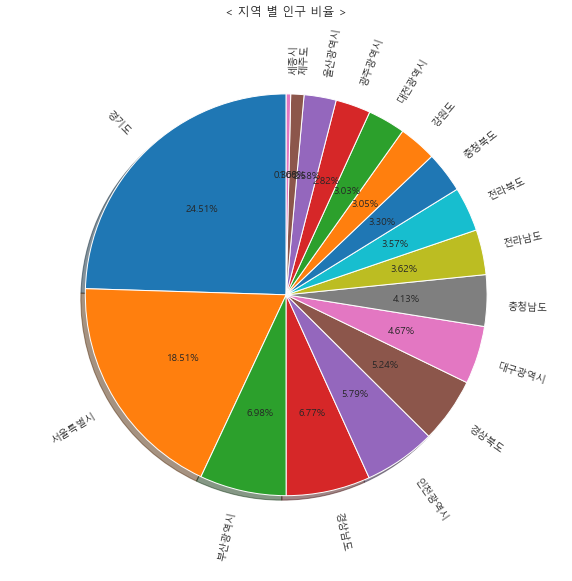

In [148]:
sido_val = np.array(med_total_1.value_counts(['시도코드']).sort_index())

plt.figure(figsize=(10, 15), facecolor='white')
plt.pie(sido_1, radius=0.9, shadow=True, labels=sido, autopct='%.2f%%', startangle=90, rotatelabels=True)
plt.title('< 지역 별 인구 비율 >', x=0.5, y=0.99)
plt.show()

### 지역별 연령대 비율 시각화 (pieplot)

In [172]:
sido = []

sido_list = list(med_total_1.value_counts(['시도코드']).index)
for one in sido_list:
    sido.append(one[0])

sido_1 = list(med_total_1.value_counts(['시도코드']).values)
    
# sido, sido_1

In [176]:
pop_count = med_total_1.groupby(['시도코드', '연령대코드(5세단위)'])['기준년도'].count()
# pop_count['강원도']

3012.6428571428573

### 강원도 인구 비율

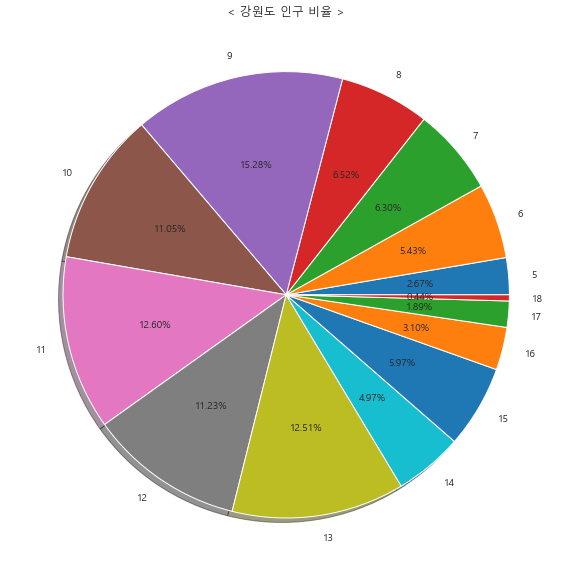

In [171]:
# sido_val = np.array(med_total_1.value_counts(['시도코드']).sort_index())

plt.figure(figsize=(10, 15), facecolor='white')
plt.pie(pop_count['강원도'], labels=pop_count['강원도'].index, radius=1, shadow=True, autopct='%.2f%%')
plt.title('< 강원도 인구 비율 >', x=0.5, y=0.99)
plt.show()

### 서울특별시 인구 비율

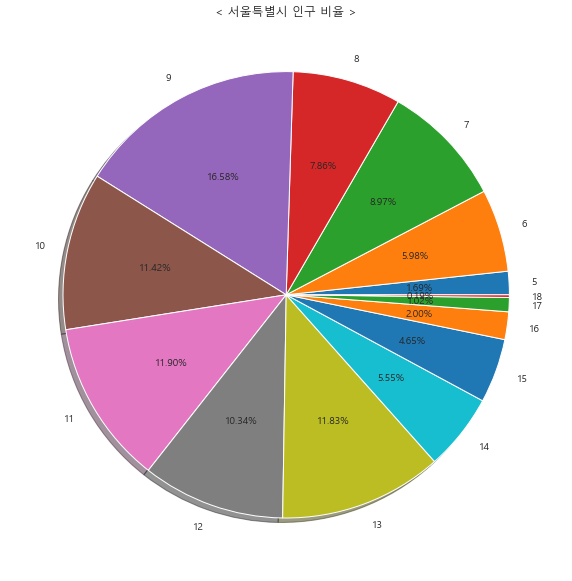

In [174]:
# sido_val = np.array(med_total_1.value_counts(['시도코드']).sort_index())

plt.figure(figsize=(10, 15), facecolor='white')
plt.pie(pop_count['서울특별시'], labels=pop_count['서울특별시'].index, radius=1, shadow=True, autopct='%.2f%%')
plt.title('< 서울특별시 인구 비율 >', x=0.5, y=0.99)
plt.show()

### 경기도 인구 비율

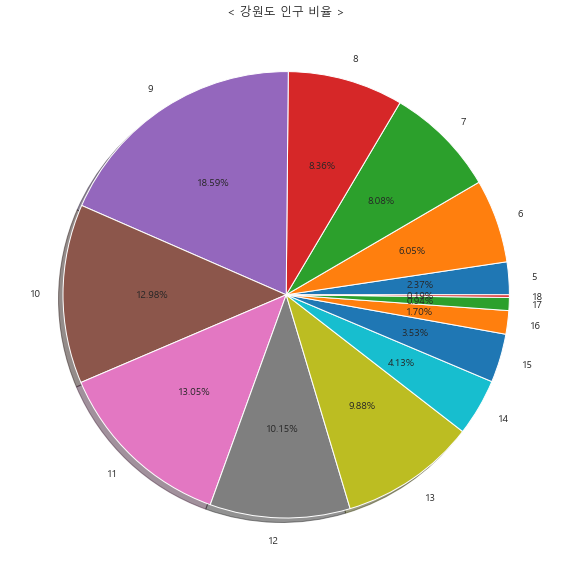

In [175]:
# sido_val = np.array(med_total_1.value_counts(['시도코드']).sort_index())

plt.figure(figsize=(10, 15), facecolor='white')
plt.pie(pop_count['경기도'], labels=pop_count['경기도'].index, radius=1, shadow=True, autopct='%.2f%%')
plt.title('< 강원도 인구 비율 >', x=0.5, y=0.99)
plt.show()

In [18]:
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [15]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [23]:
f_name

'Malgun Gothic'

### 지역별 인구 비율 시각화 (Matplotlib)

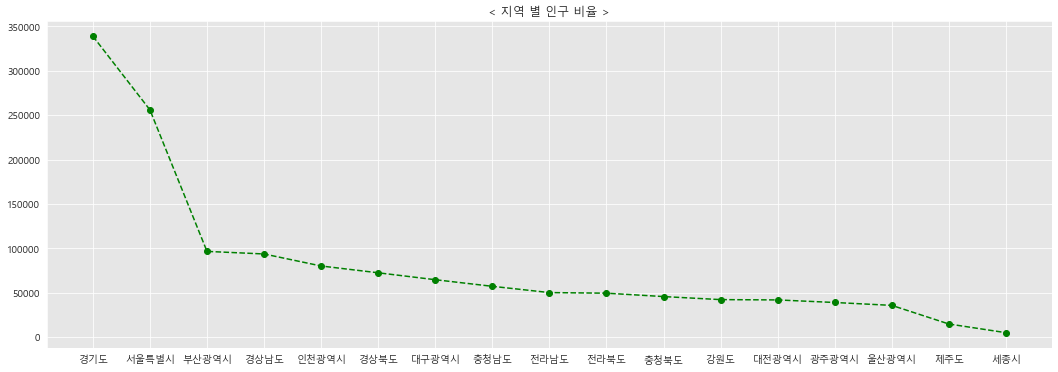

In [16]:
# sns.set_style('darkgrid', {'axes.facecolor': '.9'})
plt.figure(figsize=(18,6), facecolor='white')

plt.plot(sido, sido_1, 'go--')
plt.title('< 지역 별 인구 비율 >')
plt.show()

In [178]:
med_total_1['연령대코드(5세단위)'].value_counts()

9     234127
11    177204
10    167644
13    153189
12    146090
7     107715
8     106196
6      80351
14     68779
15     59445
5      31246
16     30134
17     17185
18      3276
Name: 연령대코드(5세단위), dtype: int64

### 연령대 별로 변수를 따로 지정해준 후 상관관계 비교

In [17]:
age_5 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==5, :]      # 31246
age_6 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==6, :]      # 80351
age_7 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==7, :]      # 107715
age_8 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==8, :]      # 106196

age_9 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==9, :]      # 234127
age_10 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==10, :]    # 167644
age_11 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==11, :]    # 177204
age_12 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==12, :]    # 146090

age_13 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==13, :]    # 153189
age_14 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==14, :]    # 68779
age_15 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==15, :]    # 59445
age_16 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==16, :]    # 30134

age_17 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==17, :]    # 17185
age_18 = med_total_1.loc[med_total_1['연령대코드(5세단위)']==18, :]    # 3276

In [18]:
## 남자
age_5_m = age_5.loc[age_5['성별코드']==1, :]      # 31246
age_6_m = age_6.loc[age_6['성별코드']==1, :]      # 80351
age_7_m = age_7.loc[age_7['성별코드']==1, :]      # 107715
age_8_m = age_8.loc[age_8['성별코드']==1, :]      # 106196

age_9_m = age_9.loc[age_9['성별코드']==1, :]      # 234127
age_10_m = age_10.loc[age_10['성별코드']==1, :]    # 167644
age_11_m = age_11.loc[age_11['성별코드']==1, :]    # 177204
age_12_m = age_12.loc[age_12['성별코드']==1, :]    # 146090

age_13_m = age_13.loc[age_13['성별코드']==1, :]    # 153189
age_14_m = age_14.loc[age_14['성별코드']==1, :]    # 68779
age_15_m = age_15.loc[age_15['성별코드']==1, :]    # 59445
age_16_m = age_16.loc[age_16['성별코드']==1, :]    # 30134

age_17_m = age_17.loc[age_17['성별코드']==1, :]    # 17185
age_18_m = age_18.loc[age_18['성별코드']==1, :]    # 3276

## 여자
age_5_w = age_5.loc[age_5['성별코드']==2, :]
age_6_w = age_6.loc[age_6['성별코드']==2, :]
age_7_w = age_7.loc[age_7['성별코드']==2, :]
age_8_w = age_8.loc[age_8['성별코드']==2, :]

age_9_w = age_9.loc[age_9['성별코드']==2, :]
age_10_w = age_10.loc[age_10['성별코드']==2, :]
age_11_w = age_11.loc[age_11['성별코드']==2, :]
age_12_w = age_12.loc[age_12['성별코드']==2, :]

age_13_w = age_13.loc[age_13['성별코드']==2, :]
age_14_w = age_14.loc[age_14['성별코드']==2, :]
age_15_w = age_15.loc[age_15['성별코드']==2, :]
age_16_w = age_16.loc[age_16['성별코드']==2, :]

age_17_w = age_17.loc[age_17['성별코드']==2, :]
age_18_w = age_18.loc[age_18['성별코드']==2, :]

In [19]:
# age_5 = age_5.loc[:, not age_5['연령대코드(5세단위)']].corr(method='pearson')
age_5_c = age_5.iloc[:, 4:].corr(method='pearson')
age_6_c = age_6.iloc[:, 4:].corr(method='pearson')
age_7_c = age_7.iloc[:, 4:].corr(method='pearson')
age_8_c = age_8.iloc[:, 4:].corr(method='pearson')

age_9_c = age_9.iloc[:, 4:].corr(method='pearson')
age_10_c = age_10.iloc[:, 4:].corr(method='pearson')
age_11_c = age_11.iloc[:, 4:].corr(method='pearson')
age_12_c = age_12.iloc[:, 4:].corr(method='pearson')

age_13_c = age_13.iloc[:, 4:].corr(method='pearson')
age_14_c = age_14.iloc[:, 4:].corr(method='pearson')
age_15_c = age_15.iloc[:, 4:].corr(method='pearson')
age_16_c = age_16.iloc[:, 4:].corr(method='pearson')

age_17_c = age_17.iloc[:, 4:].corr(method='pearson')
age_18_c = age_18.iloc[:, 4:].corr(method='pearson')

In [20]:
age_5_mc = age_5_m.iloc[:, 4:].corr(method='pearson')
age_6_mc = age_6_m.iloc[:, 4:].corr(method='pearson')
age_7_mc = age_7_m.iloc[:, 4:].corr(method='pearson')
age_8_mc = age_8_m.iloc[:, 4:].corr(method='pearson')

age_9_mc = age_9_m.iloc[:, 4:].corr(method='pearson')
age_10_mc = age_10_m.iloc[:, 4:].corr(method='pearson')
age_11_mc = age_11_m.iloc[:, 4:].corr(method='pearson')
age_12_mc = age_12_m.iloc[:, 4:].corr(method='pearson')

age_13_mc = age_13_m.iloc[:, 4:].corr(method='pearson')
age_14_mc = age_14_m.iloc[:, 4:].corr(method='pearson')
age_15_mc = age_15_m.iloc[:, 4:].corr(method='pearson')
age_16_mc = age_16_m.iloc[:, 4:].corr(method='pearson')

age_17_mc = age_17_m.iloc[:, 4:].corr(method='pearson')
age_18_mc = age_18_m.iloc[:, 4:].corr(method='pearson')

age_5_wc = age_5_w.iloc[:, 4:].corr(method='pearson')
age_6_wc = age_6_w.iloc[:, 4:].corr(method='pearson')
age_7_wc = age_7_w.iloc[:, 4:].corr(method='pearson')
age_8_wc = age_8_w.iloc[:, 4:].corr(method='pearson')

age_9_wc = age_9_w.iloc[:, 4:].corr(method='pearson')
age_10_wc = age_10_w.iloc[:, 4:].corr(method='pearson')
age_11_wc = age_11_w.iloc[:, 4:].corr(method='pearson')
age_12_wc = age_12_w.iloc[:, 4:].corr(method='pearson')

age_13_wc = age_13_w.iloc[:, 4:].corr(method='pearson')
age_14_wc = age_14_w.iloc[:, 4:].corr(method='pearson')
age_15_wc = age_15_w.iloc[:, 4:].corr(method='pearson')
age_16_wc = age_16_w.iloc[:, 4:].corr(method='pearson')

age_17_wc = age_17_w.iloc[:, 4:].corr(method='pearson')
age_18_wc = age_18_w.iloc[:, 4:].corr(method='pearson')

### 연령대 별 상관관계 비교 시각화 (Heatmap)

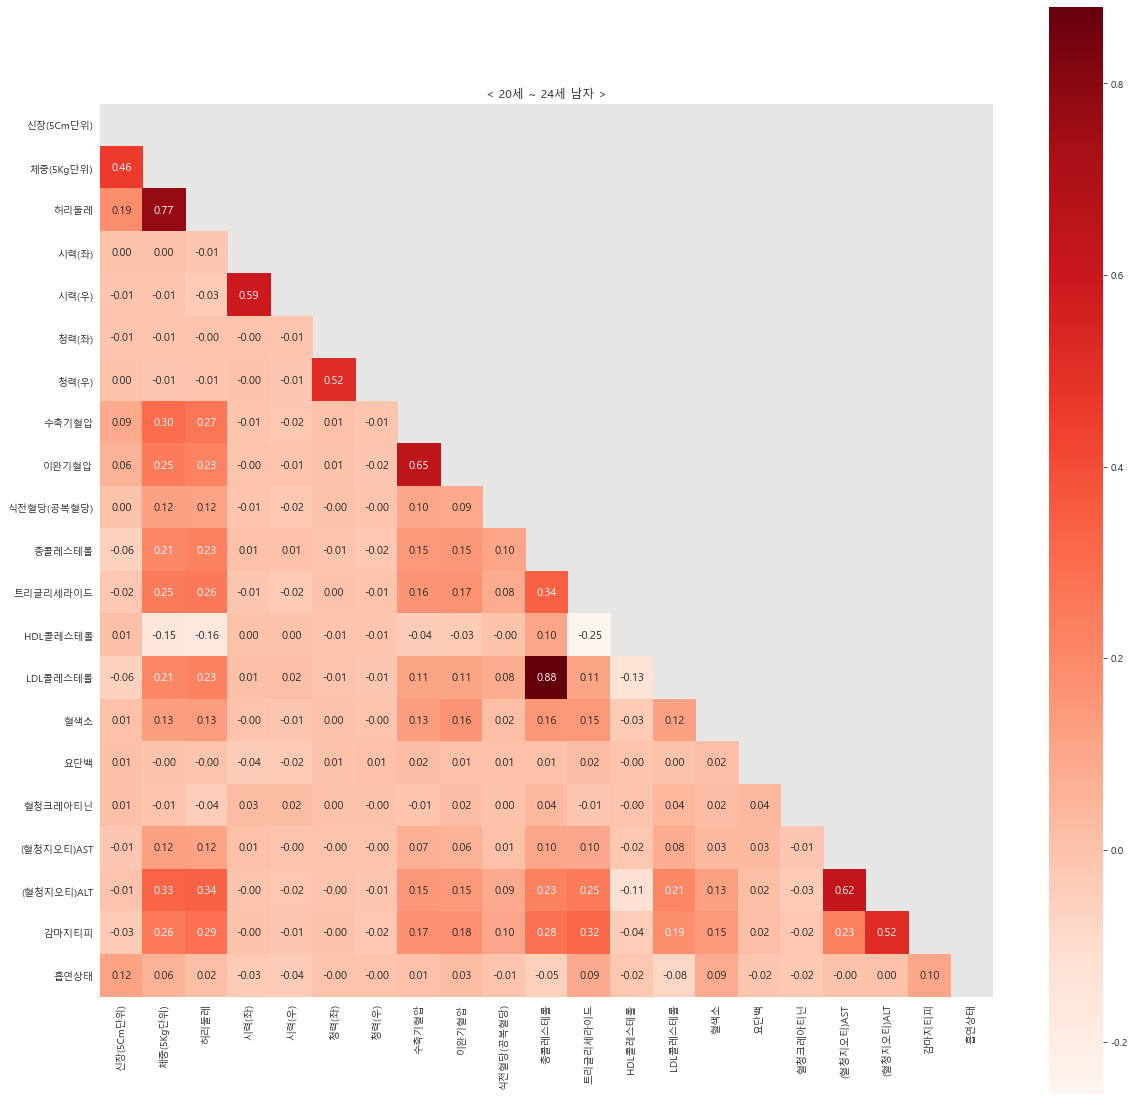

In [244]:
plt.figure(figsize=(20,20), facecolor='white')

mask = np.zeros_like(age_5_mc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(age_5_mc, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='Reds', square=True)
plt.title('< 20세 ~ 24세 남자 >')
plt.show()

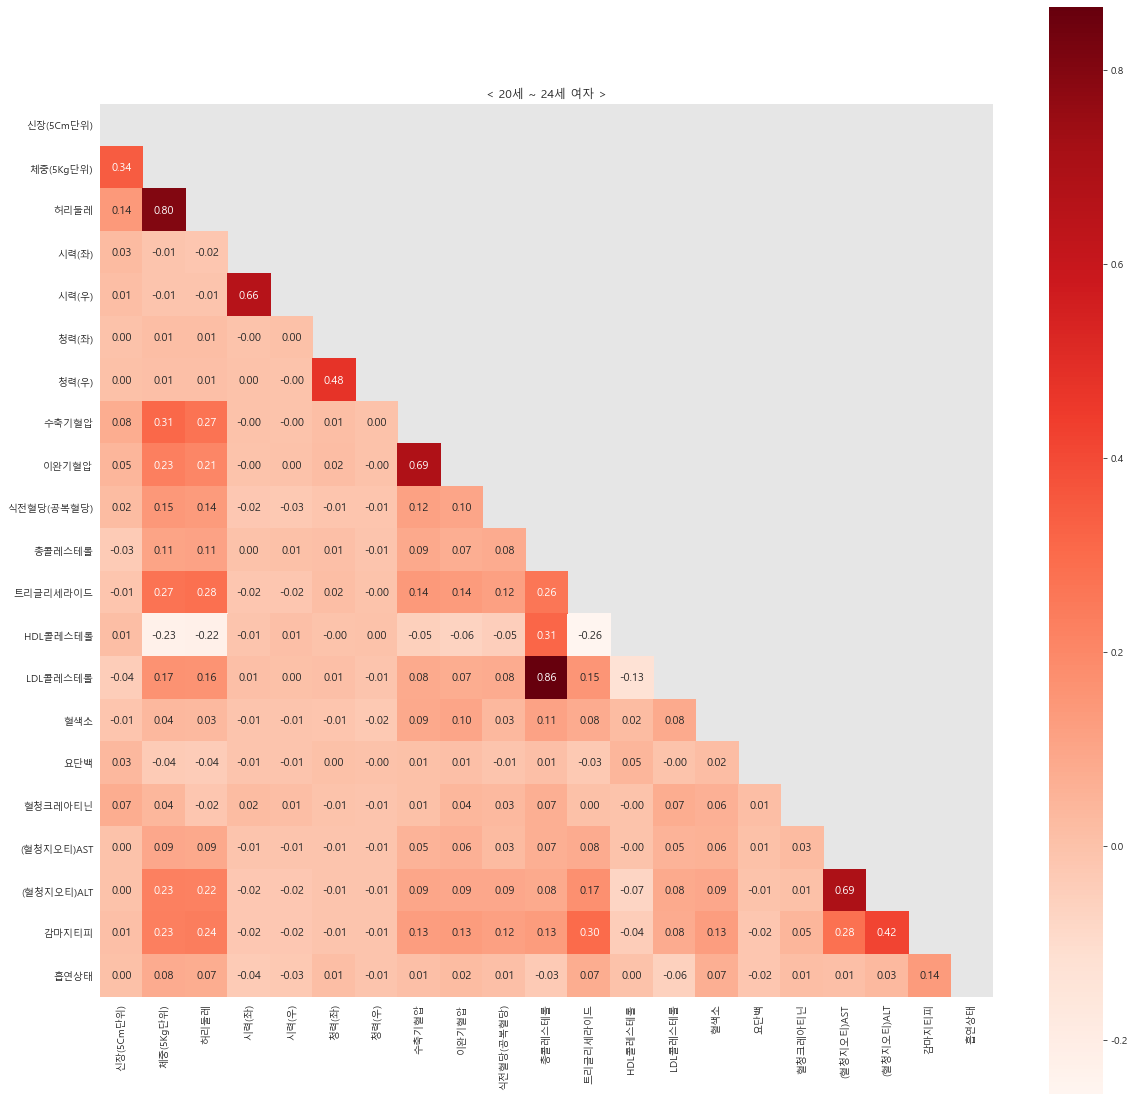

In [245]:
plt.figure(figsize=(20,20), facecolor='white')

mask = np.zeros_like(age_5_wc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(age_5_wc, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='Reds', square=True)
plt.title('< 20세 ~ 24세 여자 >')
plt.show()

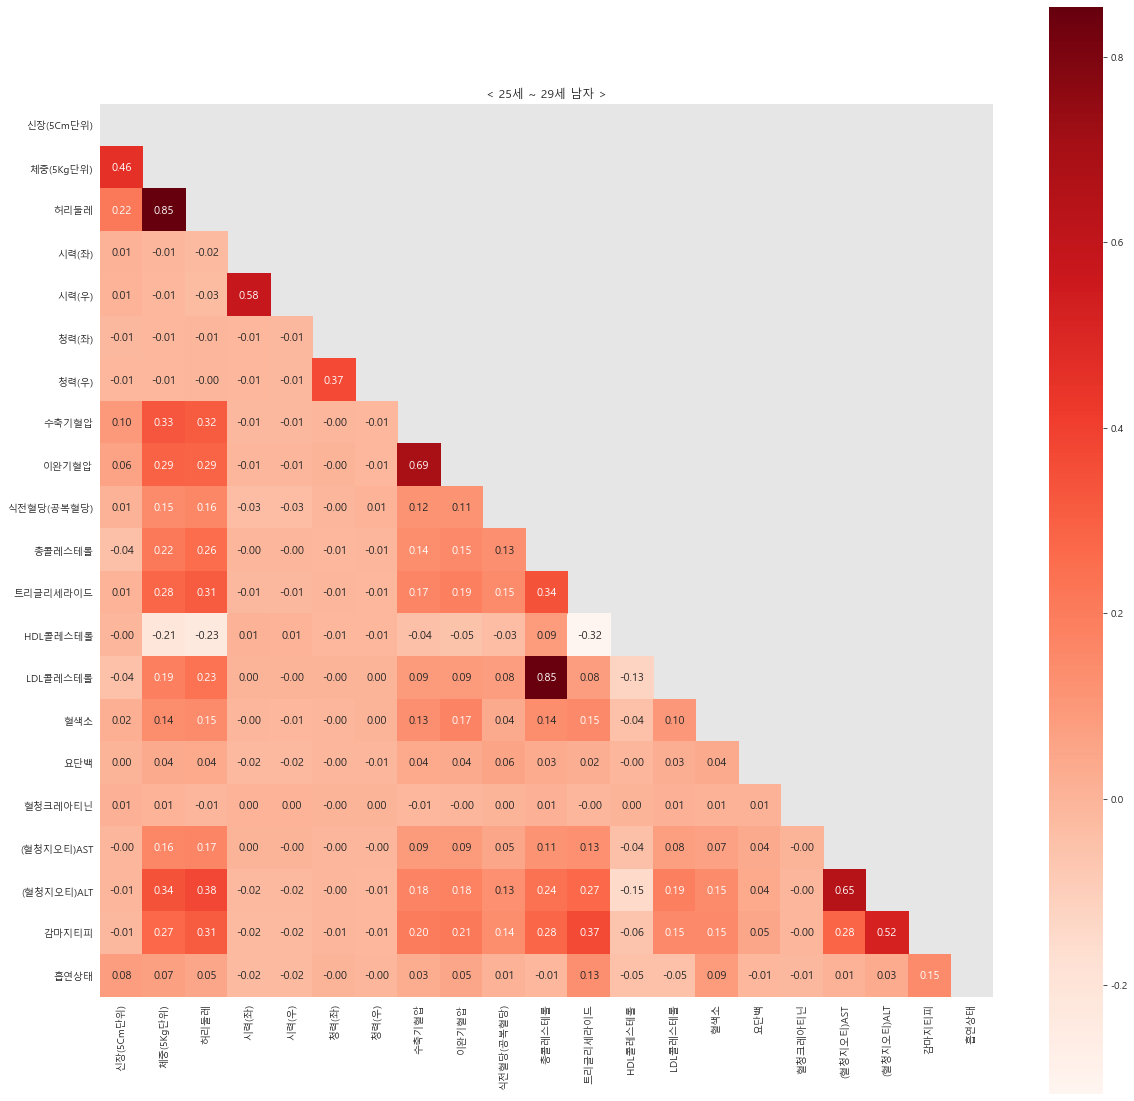

In [286]:
plt.figure(figsize=(20,20), facecolor='white')

mask = np.zeros_like(age_6_mc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(age_6_mc, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='Reds', square=True)
plt.title('< 25세 ~ 29세 남자 >')
plt.show()

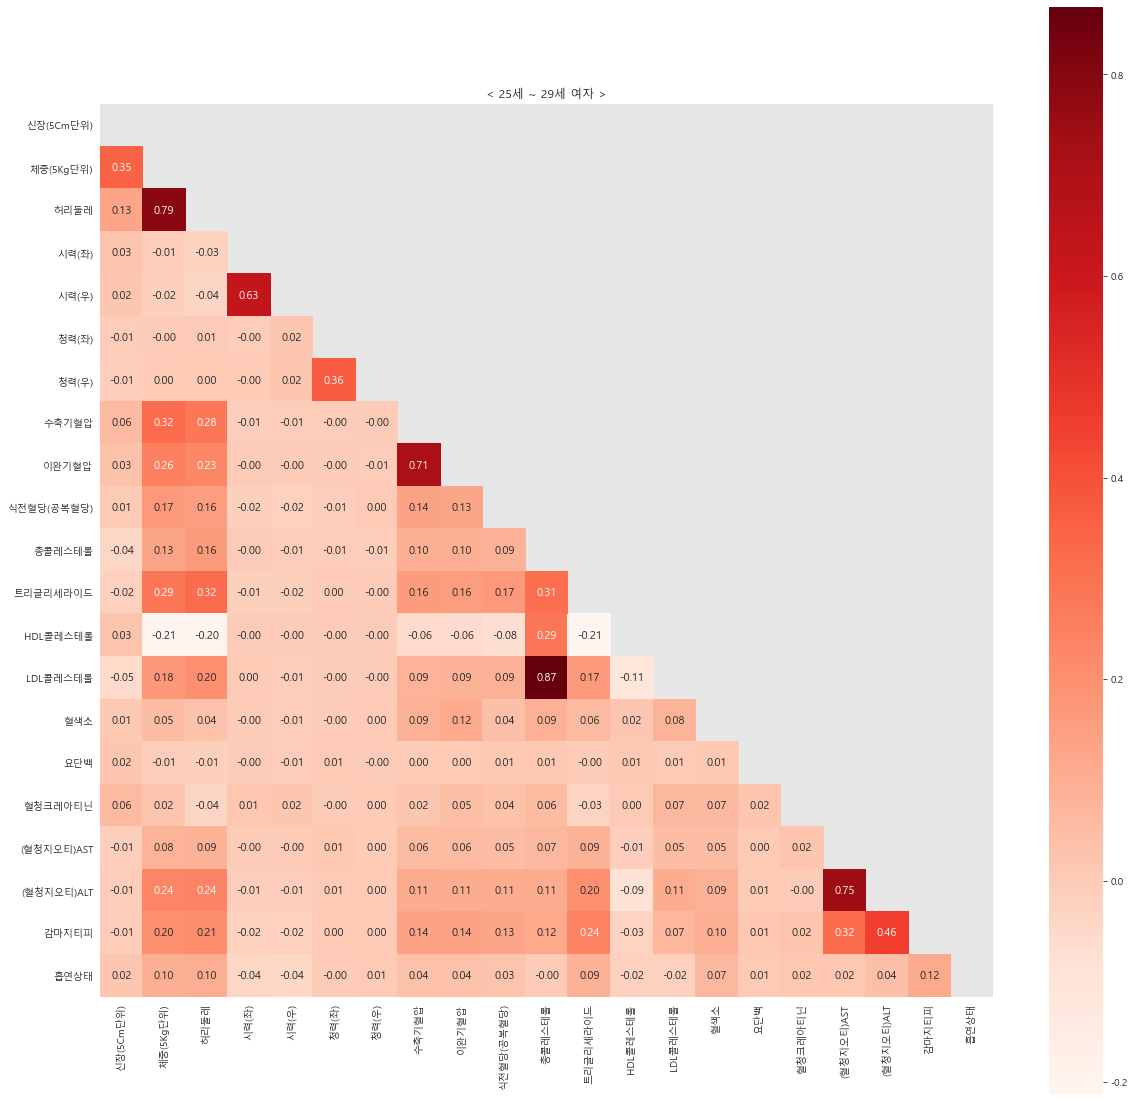

In [287]:
plt.figure(figsize=(20,20), facecolor='white')

mask = np.zeros_like(age_6_wc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(age_6_wc, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='Reds', square=True)
plt.title('< 25세 ~ 29세 여자 >')
plt.show()

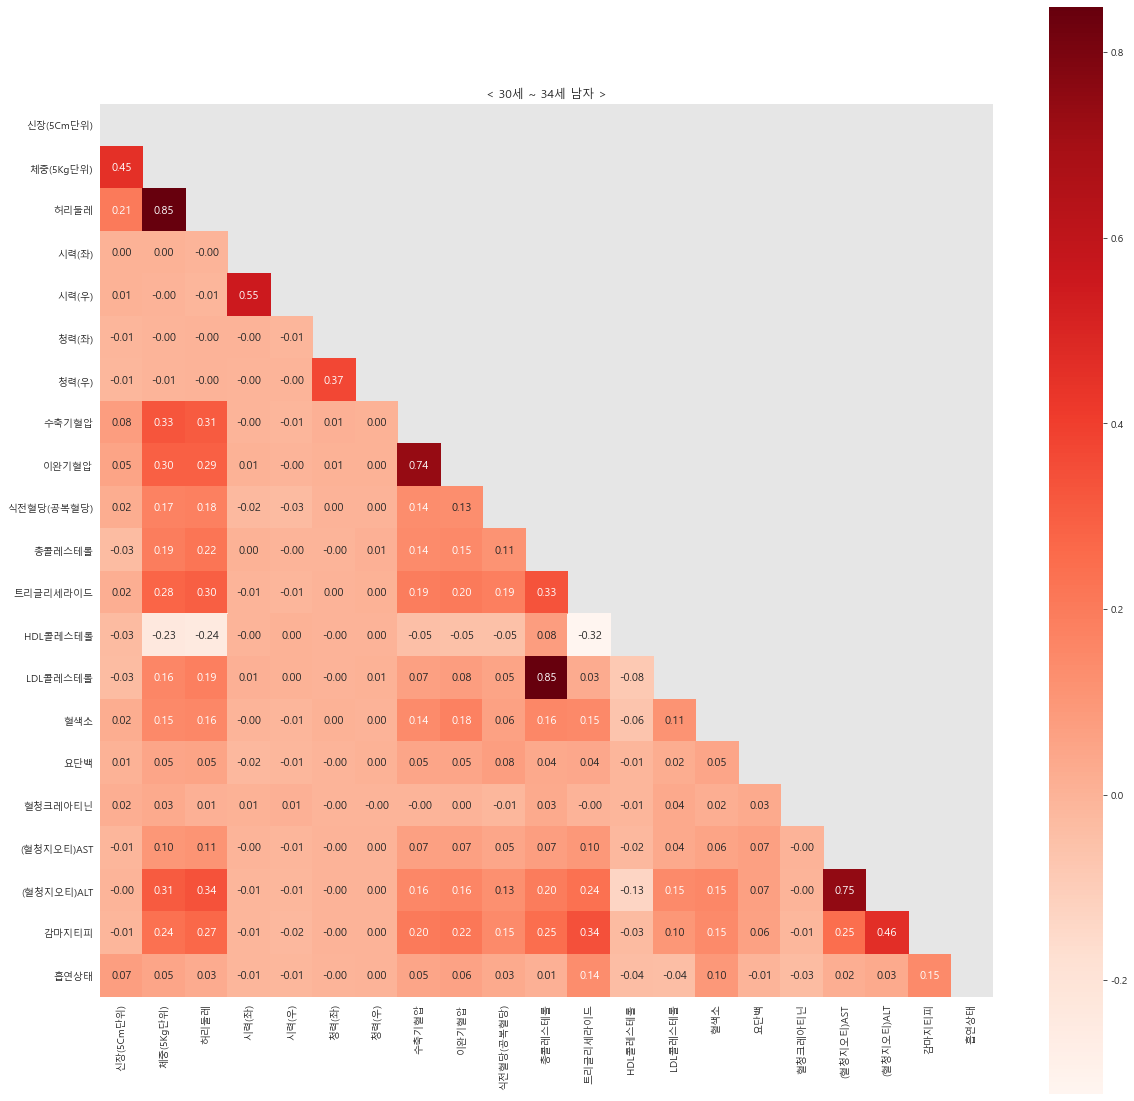

In [288]:
plt.figure(figsize=(20,20), facecolor='white')

mask = np.zeros_like(age_7_mc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(age_7_mc, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='Reds', square=True)
plt.title('< 30세 ~ 34세 남자 >')
plt.show()

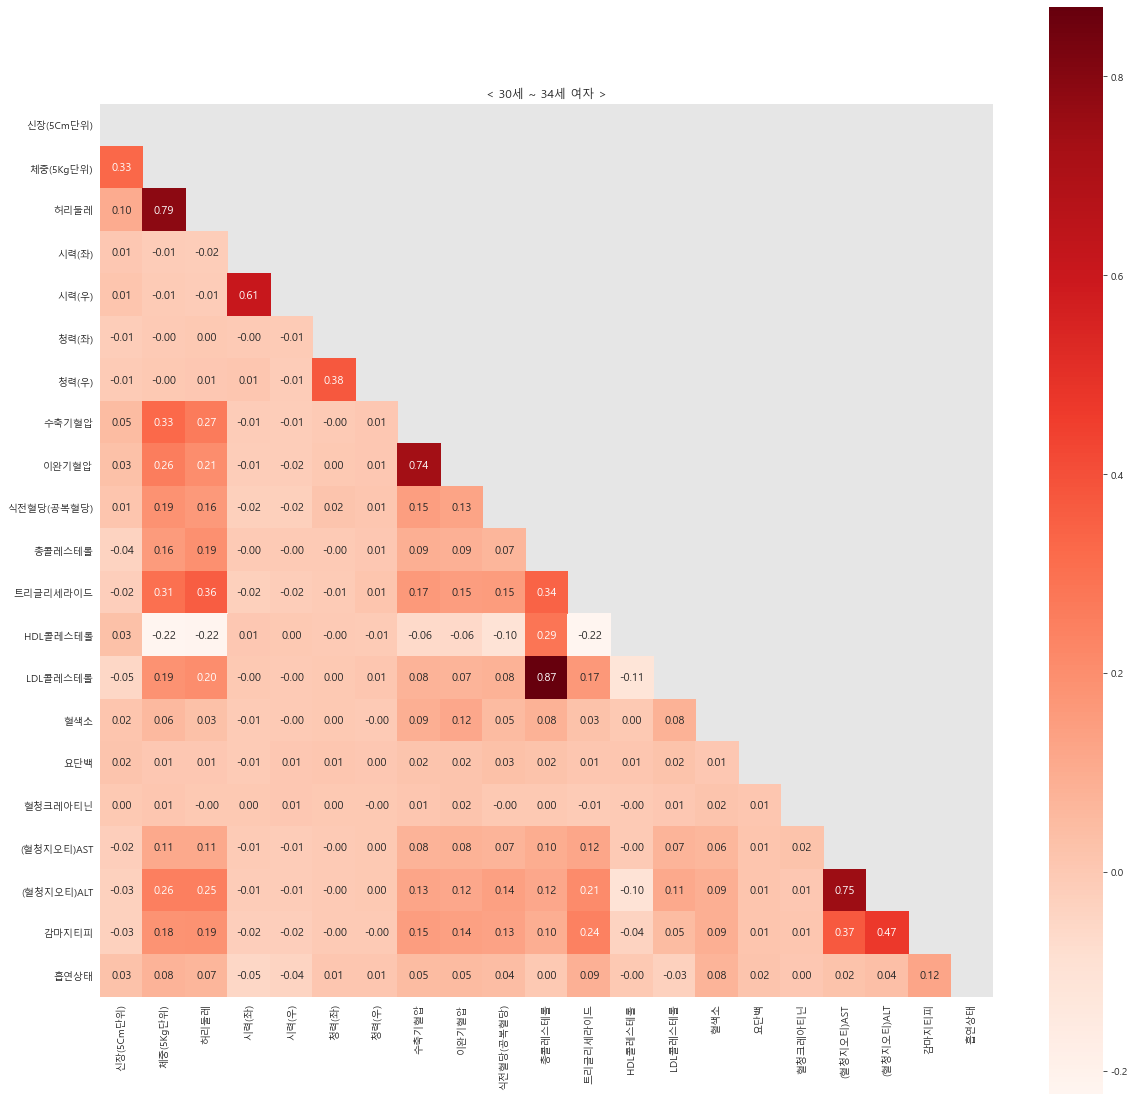

In [289]:
plt.figure(figsize=(20,20), facecolor='white')

mask = np.zeros_like(age_7_wc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(age_7_wc, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='Reds', square=True)
plt.title('< 30세 ~ 34세 여자 >')
plt.show()

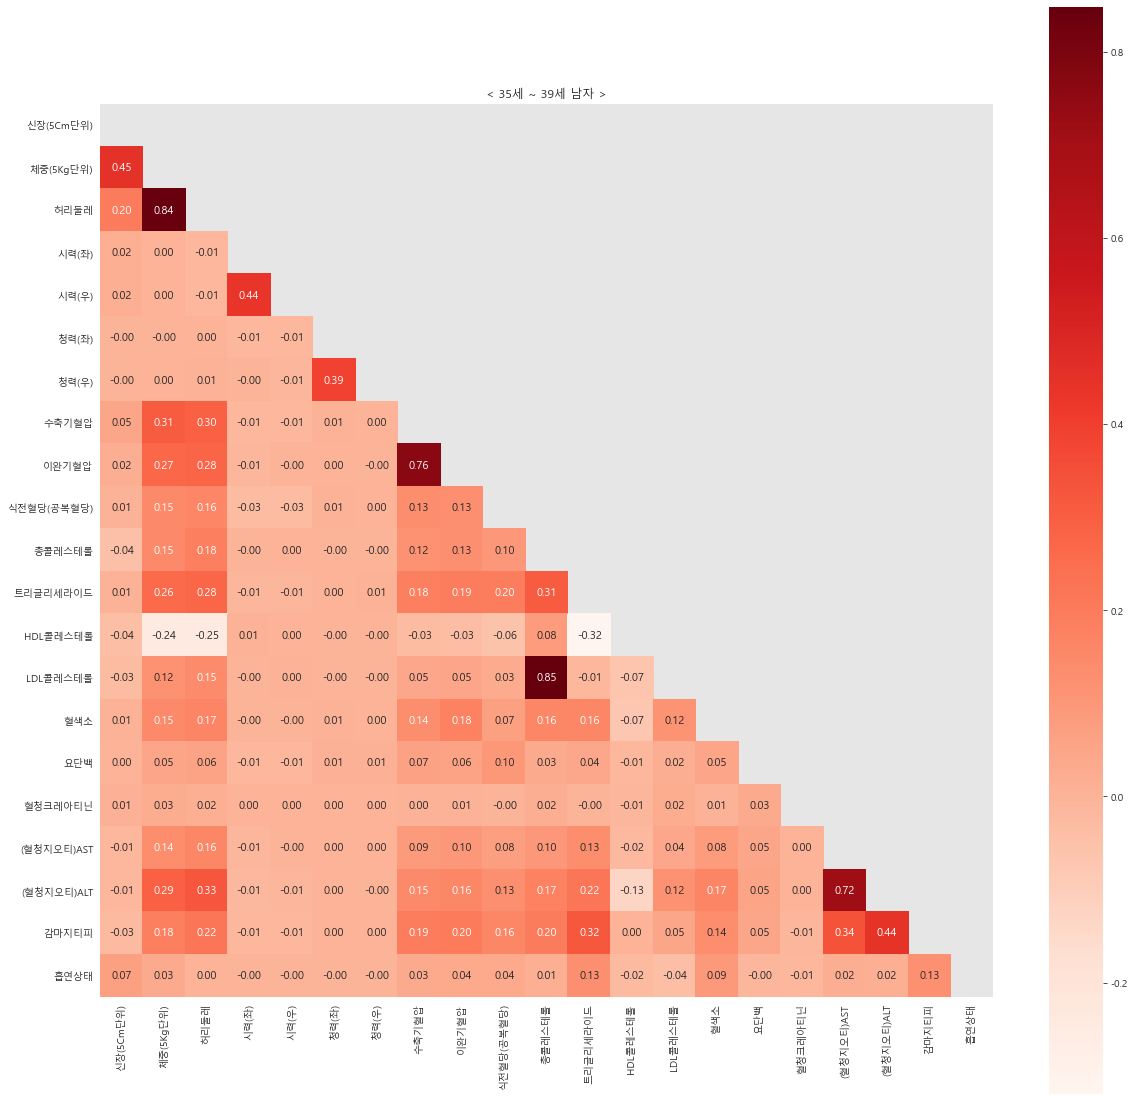

In [291]:
plt.figure(figsize=(20,20), facecolor='white')

mask = np.zeros_like(age_8_mc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(age_8_mc, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='Reds', square=True)
plt.title('< 35세 ~ 39세 남자 >')
plt.show()

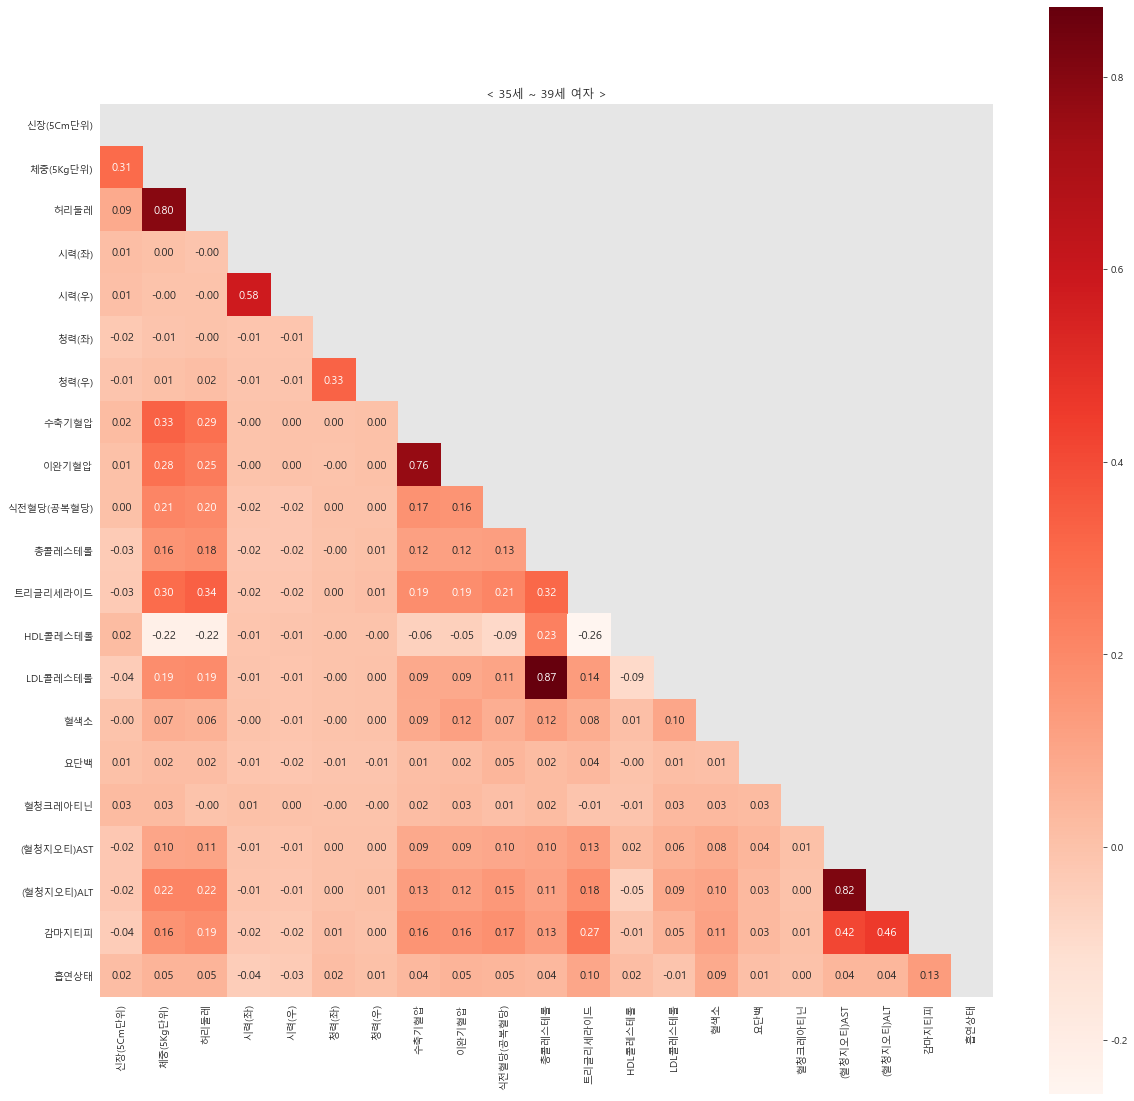

In [290]:
plt.figure(figsize=(20,20), facecolor='white')

mask = np.zeros_like(age_8_wc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(age_8_wc, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='Reds', square=True)
plt.title('< 35세 ~ 39세 여자 >')
plt.show()

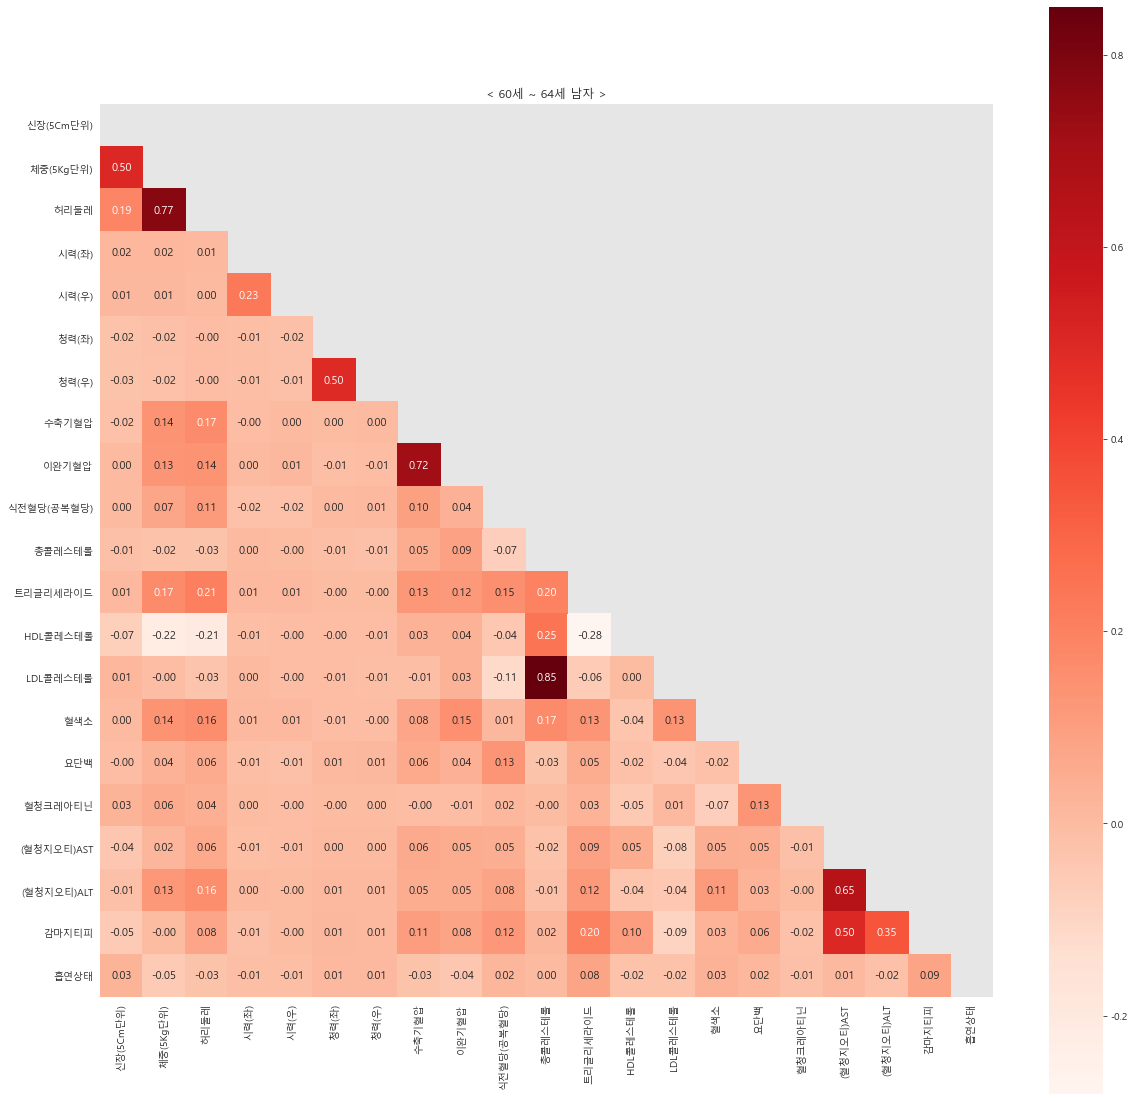

In [293]:
plt.figure(figsize=(20,20), facecolor='white')

mask = np.zeros_like(age_13_mc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(age_13_mc, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='Reds', square=True)
plt.title('< 60세 ~ 64세 남자 >')
plt.show()

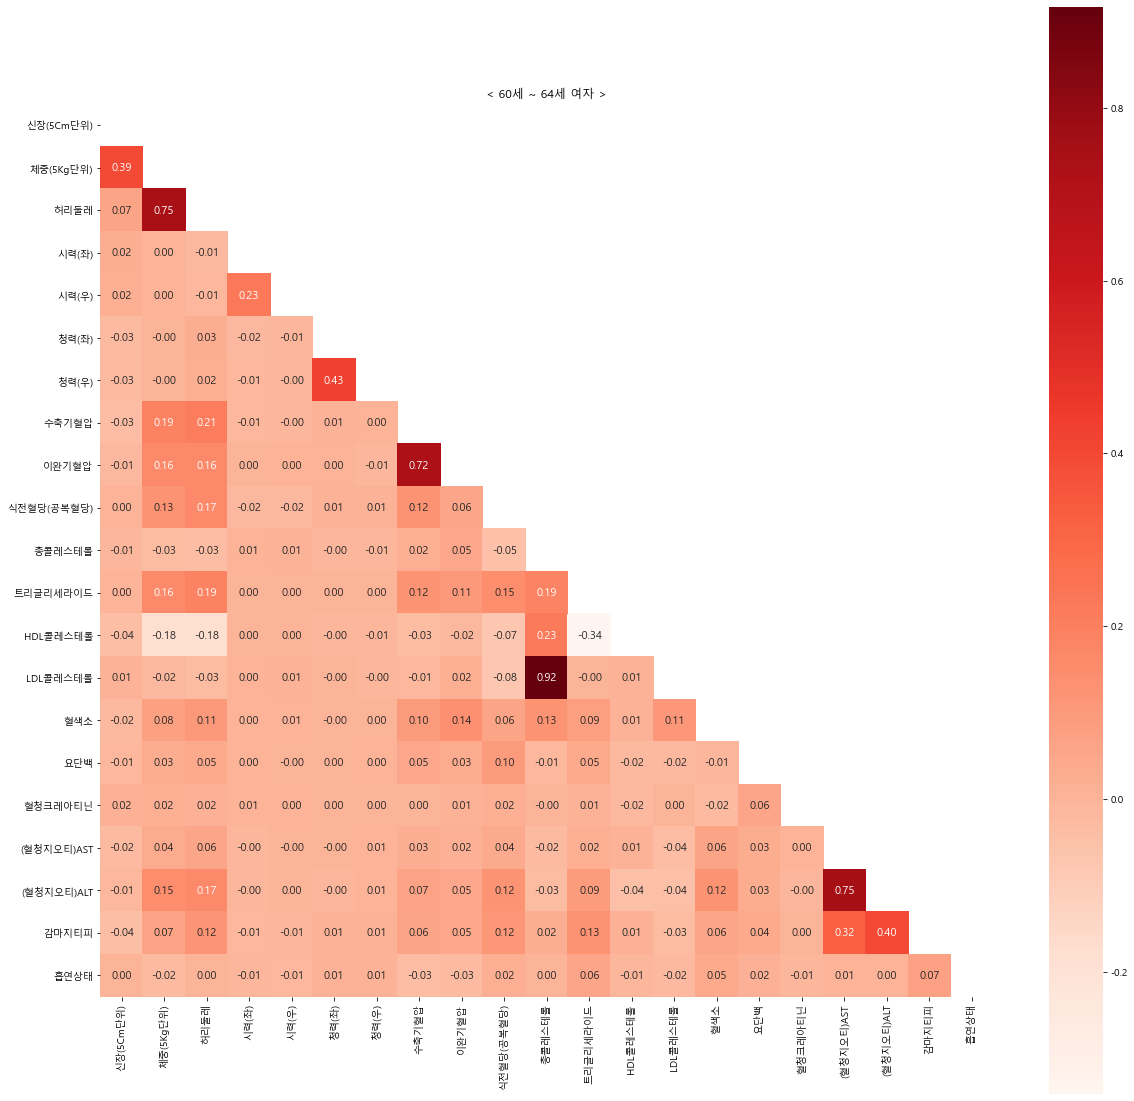

In [22]:
plt.figure(figsize=(20,20), facecolor='white')

mask = np.zeros_like(age_13_wc, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plt.subplot(5,4,1)
sns.heatmap(age_13_wc, mask=mask, annot=True, annot_kws={'size':11}, fmt='.2f', cmap='Reds', square=True)
plt.title('< 60세 ~ 64세 여자 >')
plt.show()

### 연령대 별 신장/체중 밀집도 시각화 (Jointplot)

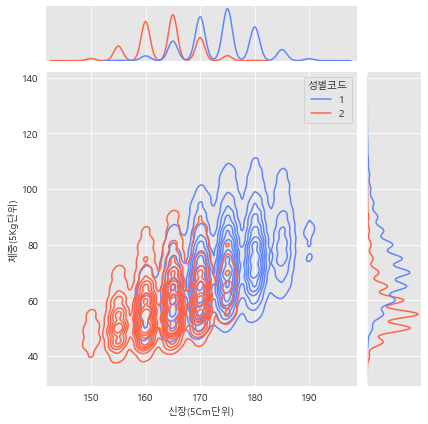

In [21]:
# plt.figure(figsize=(16,16), facecolor='white')

# sns.jointplot(x='신장(5Cm단위)', y='체중(5Kg단위)', data=age_5, kind='hex')
# sns.jointplot(data=age_5, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드")
g = sns.jointplot(data=age_5, x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', kind='kde',
                 palette={1:'#5f85ff', 2:'#ff6347'})

# g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
# g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
# hexbin.set_axis_labels(xlabel='신장', ylabel='체중')
# hexbin.fig.subtitle('< 서울 >')

# plt.show()

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

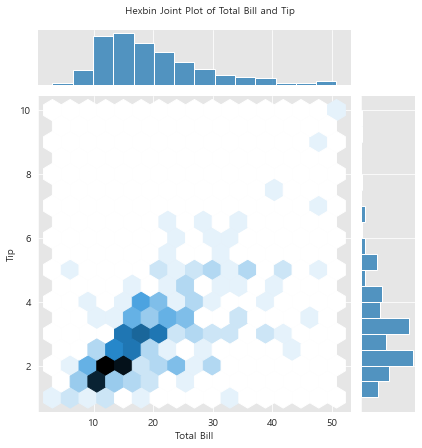

In [266]:
tips = sns.load_dataset('tips')

hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

In [296]:
med_total['신장(5Cm단위)'].sort_values(ascending=False).head(20)

2229717    205.0
2138004    200.0
3737836    200.0
3329570    200.0
2980765    200.0
3361786    200.0
3274914    200.0
2013479    200.0
3973799    200.0
2246367    200.0
2164604    200.0
3506906    195.0
3279535    195.0
3449507    195.0
3798514    195.0
3078123    195.0
3899418    195.0
3899125    195.0
3195245    195.0
3620294    195.0
Name: 신장(5Cm단위), dtype: float64

---

---

### 연령별 평균 수치 세부 분석

In [22]:
age_5_mean = age_5.iloc[:, 3:].mean()
age_6_mean = age_6.iloc[:, 3:].mean()
age_7_mean = age_7.iloc[:, 3:].mean()
age_8_mean = age_8.iloc[:, 3:].mean()
age_9_mean = age_9.iloc[:, 3:].mean()
age_10_mean = age_10.iloc[:, 3:].mean()
age_11_mean = age_11.iloc[:, 3:].mean()
age_12_mean = age_12.iloc[:, 3:].mean()
age_13_mean = age_13.iloc[:, 3:].mean()
age_14_mean = age_14.iloc[:, 3:].mean()
age_15_mean = age_15.iloc[:, 3:].mean()
age_16_mean = age_16.iloc[:, 3:].mean()
age_17_mean = age_17.iloc[:, 3:].mean()
age_18_mean = age_18.iloc[:, 3:].mean()

In [56]:
age_5_mean_1 = age_5_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_6_mean_1 = age_6_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_7_mean_1 = age_7_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_8_mean_1 = age_8_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_9_mean_1 = age_9_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_10_mean_1 = age_10_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_11_mean_1 = age_11_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_12_mean_1 = age_12_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_13_mean_1 = age_13_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_14_mean_1 = age_14_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_15_mean_1 = age_15_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_16_mean_1 = age_16_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_17_mean_1 = age_17_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])
age_18_mean_1 = age_18_mean.drop(['시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '요단백', '혈청크레아티닌'])

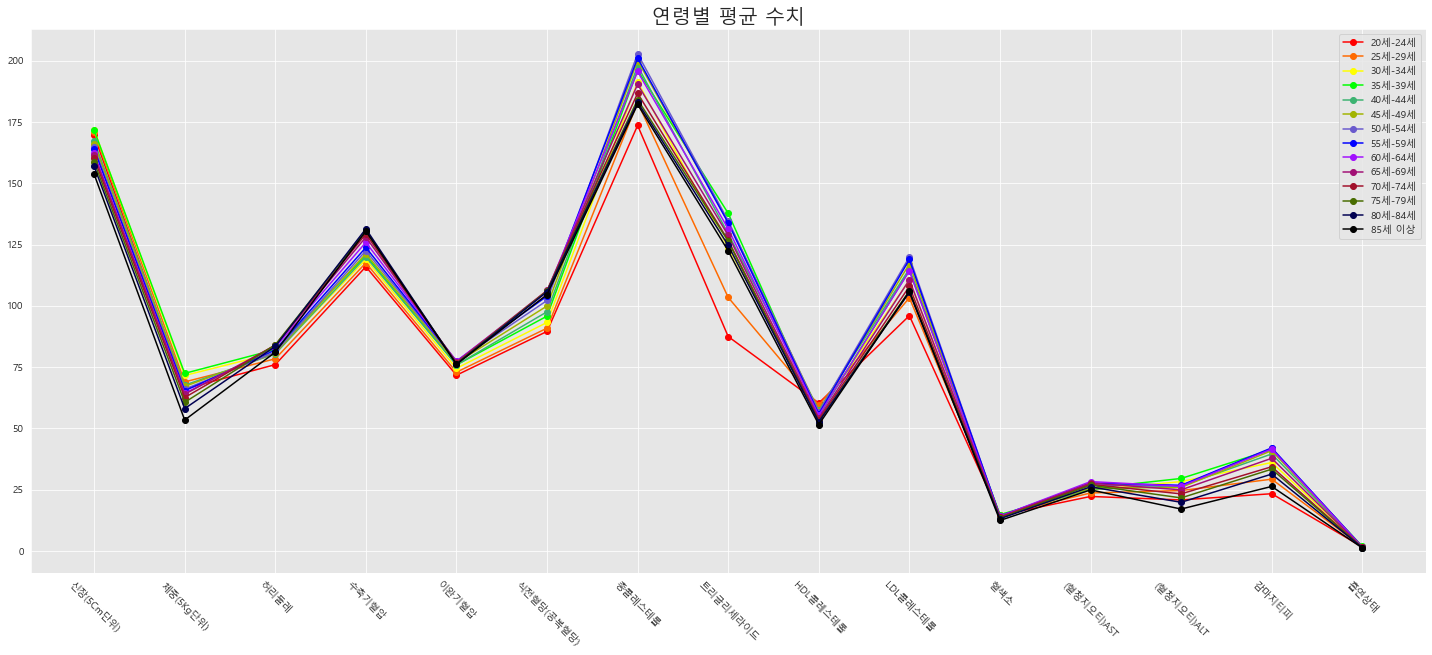

In [58]:
fig = plt.figure(figsize=(25, 10), facecolor='white')

plt.plot(age_5_mean_1, 'o-',color='#ff0000',label='20세-24세')
plt.plot(age_6_mean_1, 'o-',color='#ff6a00',label='25세-29세')
plt.plot(age_7_mean_1, 'o-',color='#ffff00',label='30세-34세')
plt.plot(age_8_mean_1, 'o-',color='#00ff00',label='35세-39세')
plt.plot(age_9_mean_1, 'o-',color='#3cb371',label='40세-44세')
plt.plot(age_10_mean_1, 'o-',color='#a2b400',label='45세-49세')
plt.plot(age_11_mean_1, 'o-',color='#6a5acd',label='50세-54세')
plt.plot(age_12_mean_1, 'o-',color='#0000ff',label='55세-59세')
plt.plot(age_13_mean_1, 'o-',color='#a210ff',label='60세-64세')
plt.plot(age_14_mean_1, 'o-',color='#a21075',label='65세-69세')
plt.plot(age_15_mean_1, 'o-',color='#a2102b',label='70세-74세')
plt.plot(age_16_mean_1, 'o-',color='#486c00',label='75세-79세')
plt.plot(age_17_mean_1, 'o-',color='#000051',label='80세-84세')
plt.plot(age_18_mean_1, 'o-',color='#000000',label='85세 이상')

plt.xticks(rotation = - 45 )

plt.grid(True)
plt.title('연령별 평균 수치',size=20)
plt.legend()

In [55]:
age_5_mean.index

Index(['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
       '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤',
       'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT',
       '감마지티피', '흡연상태'],
      dtype='object')

### 연령대 별 신장, 체중 평균 시각화 (plot)

In [44]:
male_heights = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['신장(5Cm단위)']].mean()
female_heights = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['신장(5Cm단위)']].mean()

male_weights = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['체중(5Kg단위)']].mean()
female_weights = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['체중(5Kg단위)']].mean()

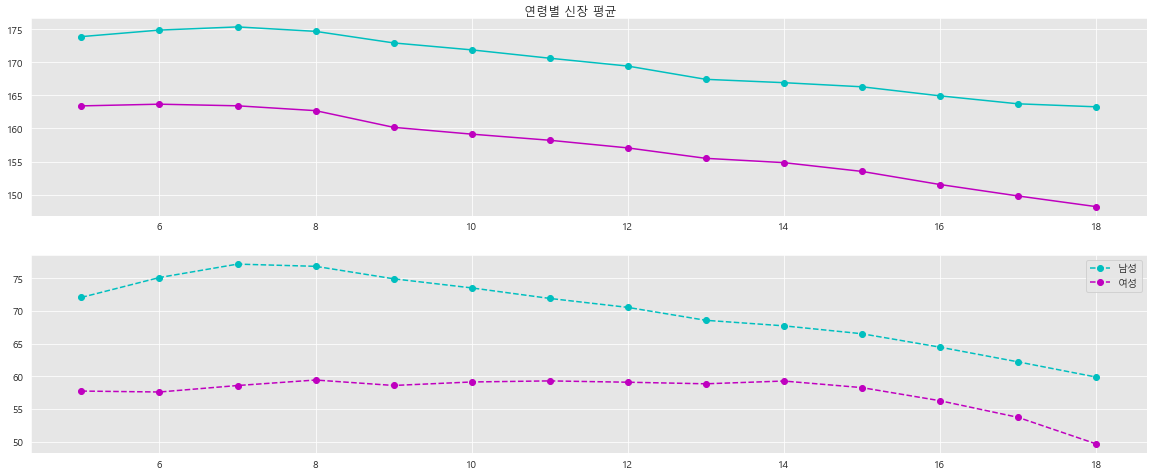

In [50]:
plt.figure(figsize=(20, 8), facecolor='white')

plt.subplot(2,1,1)
plt.plot(male_heights, 'co-', label='남성')
plt.plot(female_heights, 'mo-', label='여성')

plt.subplot(2,1,2)
plt.plot(male_weights, 'co--', label='남성')
plt.plot(female_weights, 'mo--', label='여성')

# plt.xticks(rotation = - 45 )

plt.grid(True)
plt.suptitle('< 연령별 신장 평균 >', x=0.5, y=0.91)
plt.legend()

### 연령대 별 혈압 평균 시각화 (plot)

In [59]:
male_3 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['수축기혈압']].mean()
female_3 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['수축기혈압']].mean()

male_4 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['이완기혈압']].mean()
female_4 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['이완기혈압']].mean()

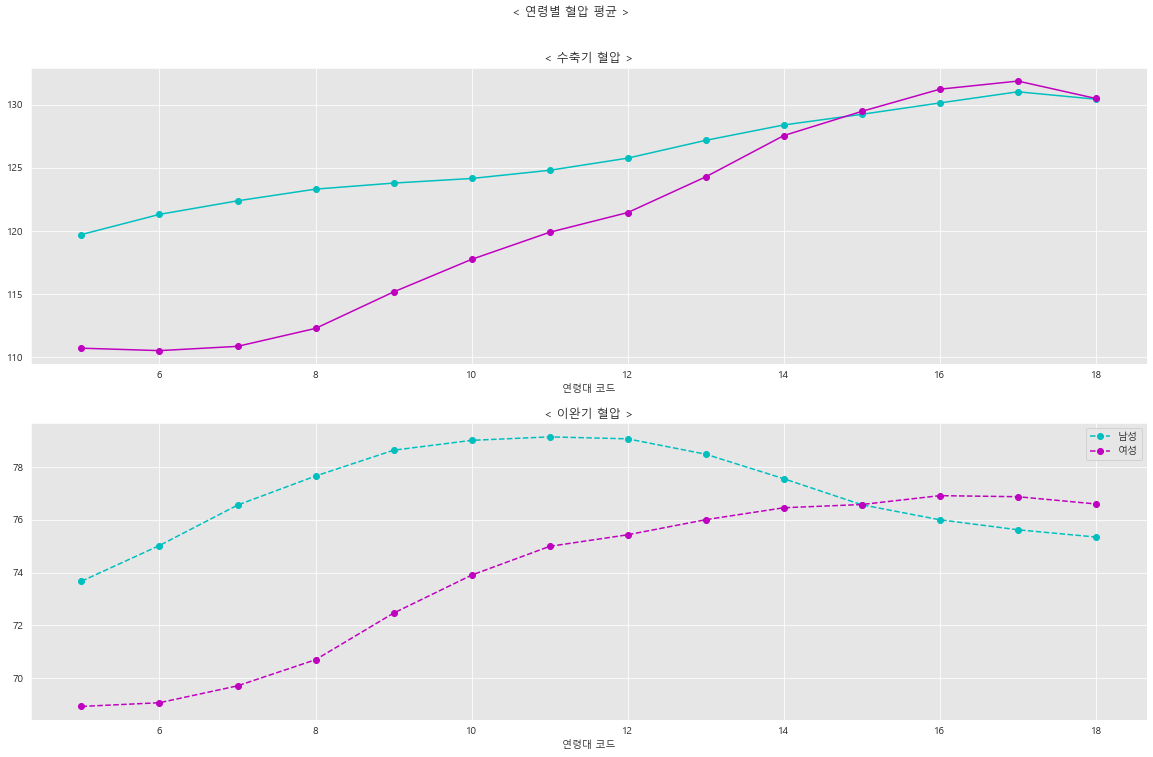

In [67]:
plt.figure(figsize=(20, 12), facecolor='white')

plt.subplot(2,1,1)
plt.plot(male_3, 'co-', label='남성')
plt.plot(female_3, 'mo-', label='여성')
plt.xlabel('연령대 코드')
plt.title('< 수축기 혈압 >')

plt.subplot(2,1,2)
plt.plot(male_4, 'co--', label='남성')
plt.plot(female_4, 'mo--', label='여성')
plt.xlabel('연령대 코드')
plt.title('< 이완기 혈압 >')

# plt.xticks(rotation = - 45 )

plt.grid(True)
plt.suptitle('< 연령별 혈압 평균 >', x=0.5, y=0.95)
plt.legend()

### 연령대 별 콜레스테롤 평균 시각화 (plot)

In [69]:
## HDL : 나쁜 콜레스테롤을 없애는 역할 , LDL : 콜레스테롤을 쌓이게 하는 역할
male_5 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['총콜레스테롤']].mean()
female_5 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['총콜레스테롤']].mean()

male_6 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['HDL콜레스테롤']].mean()
female_6 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['HDL콜레스테롤']].mean()

male_7 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['LDL콜레스테롤']].mean()
female_7 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['LDL콜레스테롤']].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

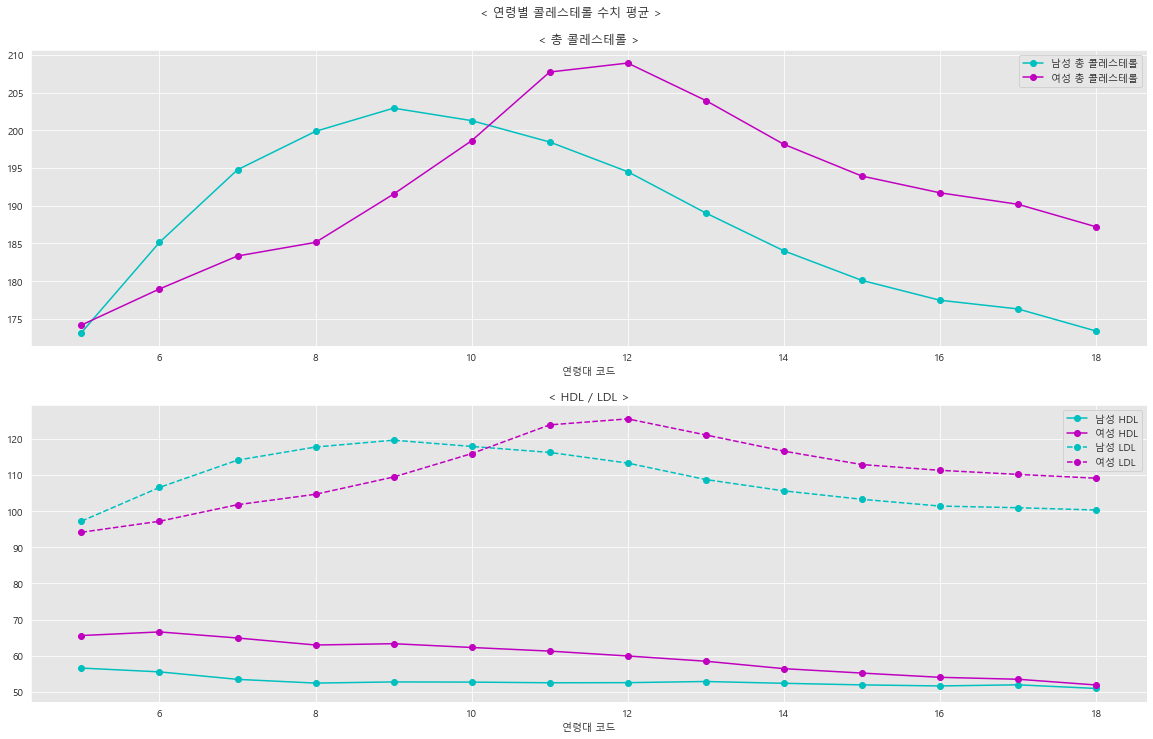

In [75]:
plt.figure(figsize=(20, 12), facecolor='white')

plt.subplot(2,1,1)
plt.plot(male_5, 'co-', label='남성 총 콜레스테롤')
plt.plot(female_5, 'mo-', label='여성 총 콜레스테롤')
plt.xlabel('연령대 코드')
plt.title('< 총 콜레스테롤 >')
plt.legend()

plt.subplot(2,1,2)
plt.plot(male_6, 'co-', label='남성 HDL')
plt.plot(female_6, 'mo-', label='여성 HDL')
plt.plot(male_7, 'co--', label='남성 LDL')
plt.plot(female_7, 'mo--', label='여성 LDL')
plt.xlabel('연령대 코드')
plt.title('< HDL / LDL >')

# plt.xticks(rotation = - 45 )

plt.grid(True)
plt.suptitle('< 연령별 콜레스테롤 수치 평균 >', x=0.5, y=0.93)
plt.legend()
plt.show

In [87]:
med_total.sort_values(by='총콜레스테롤', ascending=False).head(100)['총콜레스테롤']

2197376    9523.0
2101421    2816.0
2760920    2394.0
285037     2389.0
1319869    2386.0
            ...  
2775123     592.0
409872      589.0
2725700     588.0
2788964     587.0
2769451     581.0
Name: 총콜레스테롤, Length: 100, dtype: float64

In [86]:
med_total.loc[1351204,:]

기준년도                 2018
가입자일련번호            351205
성별코드                    1
연령대코드(5세단위)            16
시도코드                 충청남도
신장(5Cm단위)             160
체중(5Kg단위)              55
허리둘레                   85
시력(좌)                   1
시력(우)                 0.5
청력(좌)                   1
청력(우)                   1
수축기혈압                 164
이완기혈압                  85
식전혈당(공복혈당)            101
총콜레스테롤               1325
트리글리세라이드              101
HDL콜레스테롤                5
LDL콜레스테롤             1299
혈색소                  13.9
요단백                     1
혈청크레아티닌               0.8
(혈청지오티)AST             29
(혈청지오티)ALT             32
감마지티피                  97
흡연상태                    3
음주여부                    Y
구강검진 수검여부               N
데이터 공개일자       2019-12-19
Name: 1351204, dtype: object

### 연령대 별 시력, 청력 평균 시각화 (plot)

In [114]:
med_total_2 = med_total_1[med_total_1['성별코드']==1]
med_total_3 = med_total_1[med_total_1['성별코드']==2]

In [120]:
# male_8 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['시력(좌)']].mean()
# female_8 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['시력(좌)']].mean()

# male_9 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['시력(우)']].mean()
# female_9 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['시력(우)']].mean()

male_8 = med_total_2[med_total_2['시력(좌)'] != 9.9].groupby('연령대코드(5세단위)')[['시력(좌)']].mean()
female_8 = med_total_3[med_total_3['시력(좌)'] != 9.9].groupby('연령대코드(5세단위)')[['시력(좌)']].mean()

male_9 = med_total_2[med_total_2['시력(우)'] != 9.9].groupby('연령대코드(5세단위)')[['시력(우)']].mean()
female_9 = med_total_3[med_total_3['시력(우)'] != 9.9].groupby('연령대코드(5세단위)')[['시력(우)']].mean()

male_10 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['청력(좌)']].mean()
female_10 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['청력(좌)']].mean()

male_11 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['청력(우)']].mean()
female_11 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['청력(우)']].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

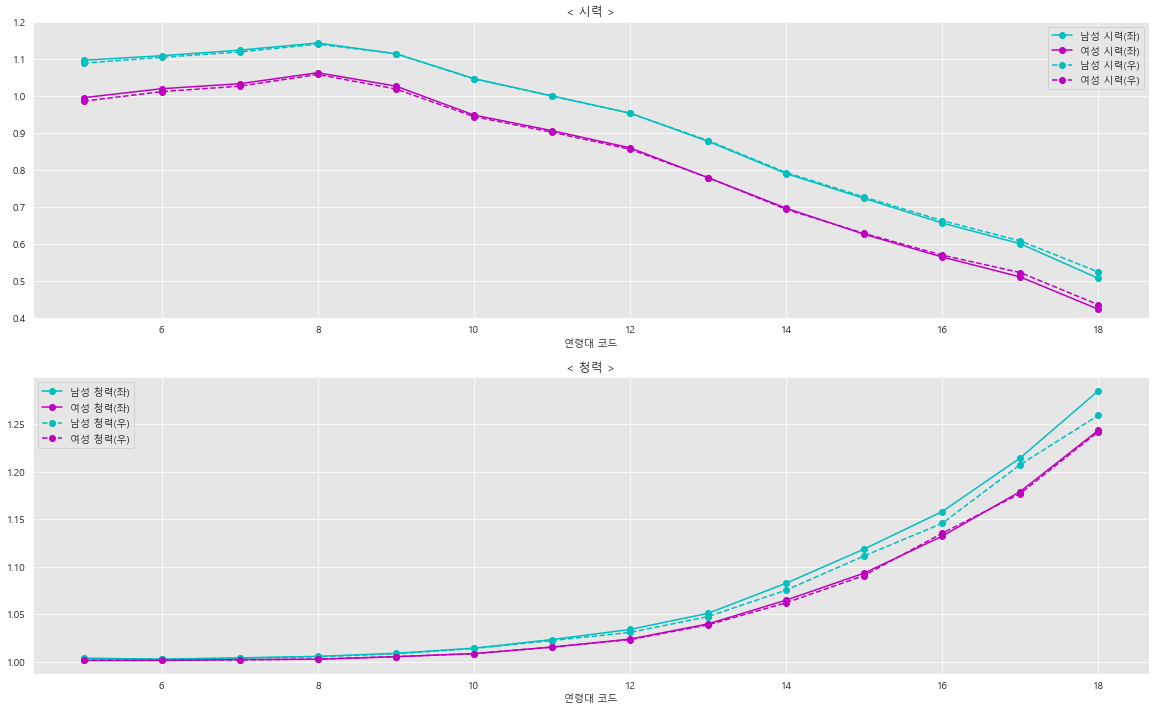

In [121]:
plt.figure(figsize=(20, 12), facecolor='white')

plt.subplot(2,1,1)
plt.plot(male_8, 'co-', label='남성 시력(좌)')
plt.plot(female_8, 'mo-', label='여성 시력(좌)')
plt.plot(male_9, 'co--', label='남성 시력(우)')
plt.plot(female_9, 'mo--', label='여성 시력(우)')
plt.ylim([0.4, 1.2])
plt.xlabel('연령대 코드')
plt.title('< 시력 >')
plt.legend()

plt.subplot(2,1,2)
plt.plot(male_10, 'co-', label='남성 청력(좌)')
plt.plot(female_10, 'mo-', label='여성 청력(좌)')
plt.plot(male_11, 'co--', label='남성 청력(우)')
plt.plot(female_11, 'mo--', label='여성 청력(우)')
plt.xlabel('연령대 코드')
plt.title('< 청력 >')

plt.grid(True)
plt.legend()
plt.show

### 실명 표본 제외

In [111]:
left_eye = med_total[med_total['시력(좌)']==9.9]  # 12874명
right_eye = med_total[med_total['시력(우)']==9.9]  # 12821명

left_eye.groupby('연령대코드(5세단위)')['기준년도'].count()

연령대코드(5세단위)
5       63
6      149
7      257
8      310
9      663
10     770
11    1305
12    1302
13    1743
14    1359
15    2012
16    1352
17    1166
18     423
Name: 기준년도, dtype: int64

In [112]:
right_eye.groupby('연령대코드(5세단위)')['기준년도'].count()

연령대코드(5세단위)
5       61
6      135
7      210
8      307
9      667
10     817
11    1232
12    1350
13    1743
14    1365
15    2001
16    1305
17    1174
18     454
Name: 기준년도, dtype: int64

### 연령대 별 트리글리세라이드 평균 시각화 (plot)

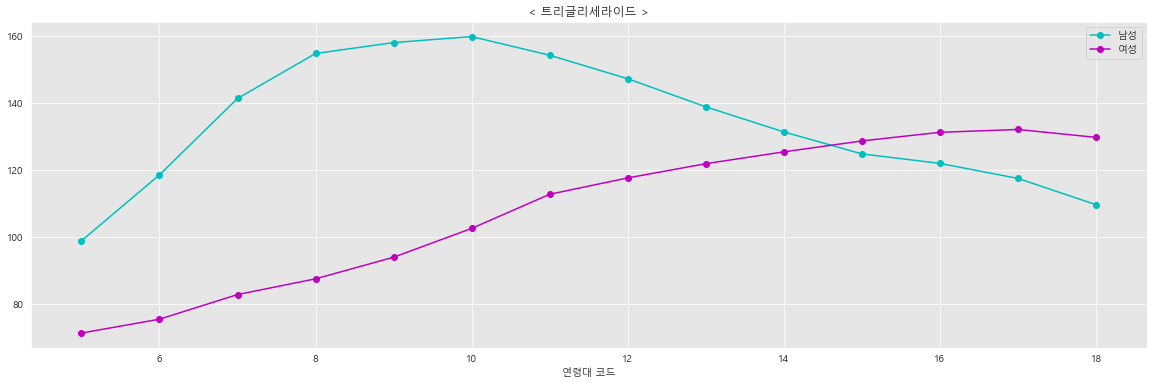

In [126]:
male_12 = med_total_1[med_total_1['성별코드']==1].groupby('연령대코드(5세단위)')[['트리글리세라이드']].mean()
female_12 = med_total_1[med_total_1['성별코드']==2].groupby('연령대코드(5세단위)')[['트리글리세라이드']].mean()

plt.figure(figsize=(20, 6), facecolor='white')

plt.plot(male_12, 'co-', label='남성')
plt.plot(female_12, 'mo-', label='여성')
plt.xlabel('연령대 코드')
plt.title('< 트리글리세라이드 >')

# plt.xticks(rotation = - 45 )

plt.grid(True)
plt.legend()

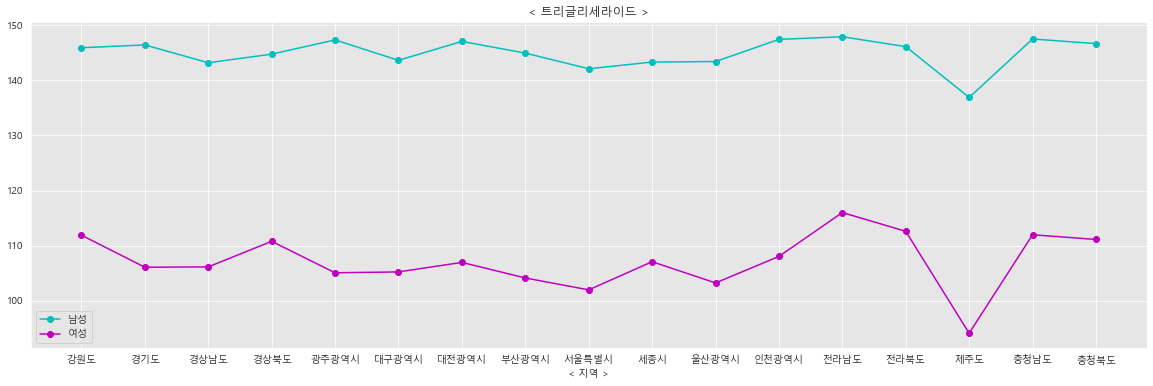

In [129]:
male_13 = med_total_1[med_total_1['성별코드']==1].groupby('시도코드')[['트리글리세라이드']].mean()
female_13 = med_total_1[med_total_1['성별코드']==2].groupby('시도코드')[['트리글리세라이드']].mean()

plt.figure(figsize=(20, 6), facecolor='white')

plt.plot(male_13, 'co-', label='남성')
plt.plot(female_13, 'mo-', label='여성')
plt.xlabel('< 지역 >')
plt.title('< 트리글리세라이드 >')

# plt.xticks(rotation = - 45 )

plt.grid(True)
plt.legend()
plt.show()

In [138]:
# med_total = pd.concat([med19, med18, med17, med16], ignore_index=True)
age_20 = pd.concat([age_5, age_6], ignore_index=True)
age_40 = pd.concat([age_9, age_10], ignore_index=True)
age_60 = pd.concat([age_13, age_14], ignore_index=True)
age_80 = pd.concat([age_17, age_18], ignore_index=True)

In [154]:
test = med_total_1.copy()
test['시도코드'] = test['시도코드'].astype('str')

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382581 entries, 2 to 3999999
Data columns (total 29 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   기준년도         1382581 non-null  int64  
 1   가입자일련번호      1382581 non-null  int64  
 2   성별코드         1382581 non-null  int64  
 3   연령대코드(5세단위)  1382581 non-null  int64  
 4   시도코드         1382581 non-null  object 
 5   신장(5Cm단위)    1382581 non-null  float64
 6   체중(5Kg단위)    1382581 non-null  float64
 7   허리둘레         1382581 non-null  float64
 8   시력(좌)        1382581 non-null  float64
 9   시력(우)        1382581 non-null  float64
 10  청력(좌)        1382581 non-null  float64
 11  청력(우)        1382581 non-null  float64
 12  수축기혈압        1382581 non-null  float64
 13  이완기혈압        1382581 non-null  float64
 14  식전혈당(공복혈당)   1382581 non-null  float64
 15  총콜레스테롤       1382581 non-null  float64
 16  트리글리세라이드     1382581 non-null  float64
 17  HDL콜레스테롤     1382581 non-null  float64
 18  LD

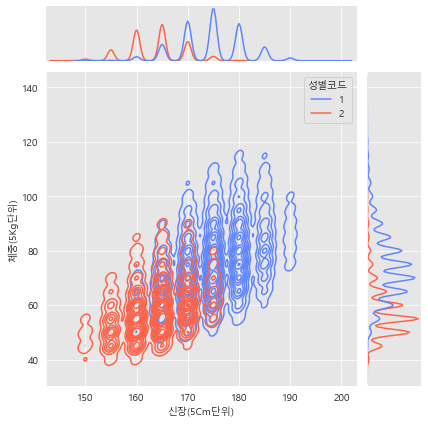

In [139]:
sns.jointplot(data=age_20, x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', kind='kde',
                 palette={1:'#5f85ff', 2:'#ff6347'})

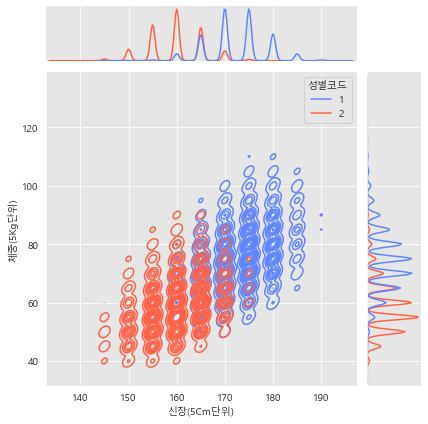

In [141]:
sns.jointplot(data=age_40, x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', kind='kde',
                 palette={1:'#5f85ff', 2:'#ff6347'})

Wall time: 0 ns


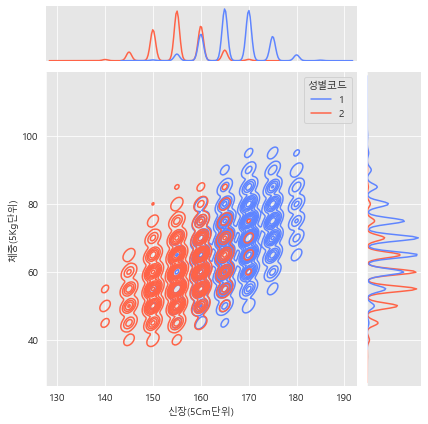

In [150]:
sns.jointplot(data=age_60, x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', kind='kde',
                 palette={1:'#5f85ff', 2:'#ff6347'})

In [ ]:
sns.jointplot(data=age_80, x="신장(5Cm단위)", y="체중(5Kg단위)", hue='성별코드', kind='kde',
                 palette={1:'#5f85ff', 2:'#ff6347'})